In [26]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import imutils
import copy

In [27]:
image= cv2.imread('frame.jpg')

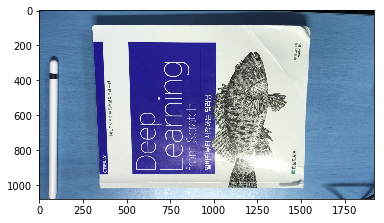

In [28]:
image.shape
plt.imshow(image)

In [29]:
ratio = image.shape[0] / 500.0
orig = copy.deepcopy(image)
image = imutils.resize(image, height = 500)

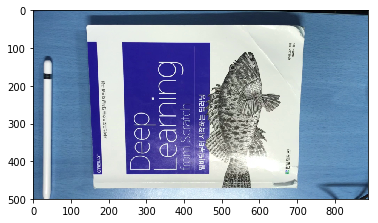

In [30]:
image.shape
plt.imshow(image)

In [35]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (3, 3), 0)
edged = cv2.Canny(gray, 30, 100)
 

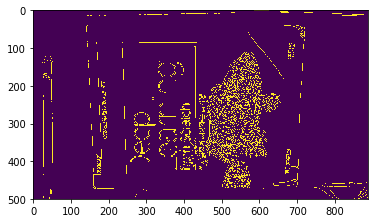

In [36]:
plt.imshow(edged)

In [44]:
# find the contours in the edged image, keeping only the
# largest ones, and initialize the screen contour
cnts = cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if imutils.is_cv2() else cnts[1]
cnts = sorted(cnts, key = cv2.contourArea, reverse = True)[:5]
 
# loop over the contours
for c in cnts:
	# approximate the contour
	peri = cv2.arcLength(c, True)
	approx = cv2.approxPolyDP(c, 0.02 * peri, True)
 
	# if our approximated contour has four points, then we
	# can assume that we have found our screen
	if len(approx) == 4:
		screenCnt = approx
		break

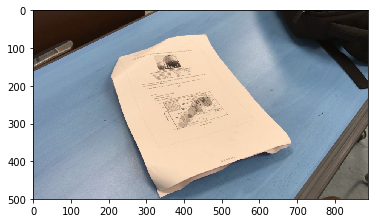

In [52]:
# cv2.drawContours(image, cnts, -1, (0,255,0),2)
plt.imshow(image)

In [46]:
len(approx)

8

True

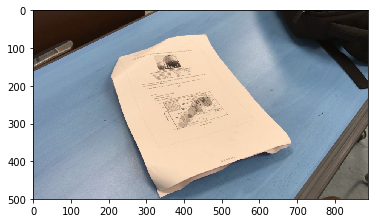

In [51]:
cv2.drawContours(image, [screenCnt], -1, (0, 255, 0), 2)
plt.imshow(image)
cv2.imwrite('contoured.jpg',image)

In [48]:
img= cv2.imread('frame.jpg')
imgray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(imgray,127,255,0)
im2, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
c = max(contours, key=cv2.contourArea) #max contour

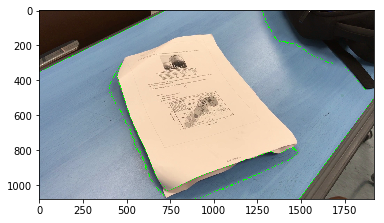

In [49]:
cv2.drawContours(img,c,-1,(0,255,0),2)
plt.imshow(img)

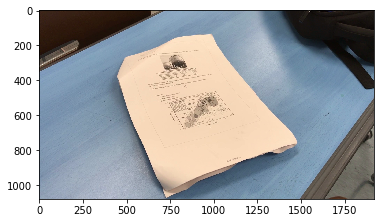

In [50]:
img= cv2.imread('frame.jpg')
cnt = contours[4]
cv2.drawContours(img, [cnt], 0, (0,255,0), 3)
plt.imshow(img)